In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()
print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
(200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.0

In [4]:
print("missing values per column:", df.isnull().sum())

missing values per column: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
if df['Gender'].dtype == 'object':
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    print("Encoded target labels:", list(le.classes_))

Encoded target labels: ['Female', 'Male']


In [6]:
X = df[['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

print("Features selected for clustering:")
print("Shape:", X.shape)
print("\nFeature statistics:")
print(pd.DataFrame(X, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']).describe())

Features selected for clustering:
Shape: (200, 4)

Feature statistics:
           Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.440000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      0.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000


In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data standardized successfully")
print("Scaled data shape:", X_scaled.shape)
print("\nScaled data sample:")
print(X_scaled[:5])



Data standardized successfully
Scaled data shape: (200, 4)

Scaled data sample:
[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]]


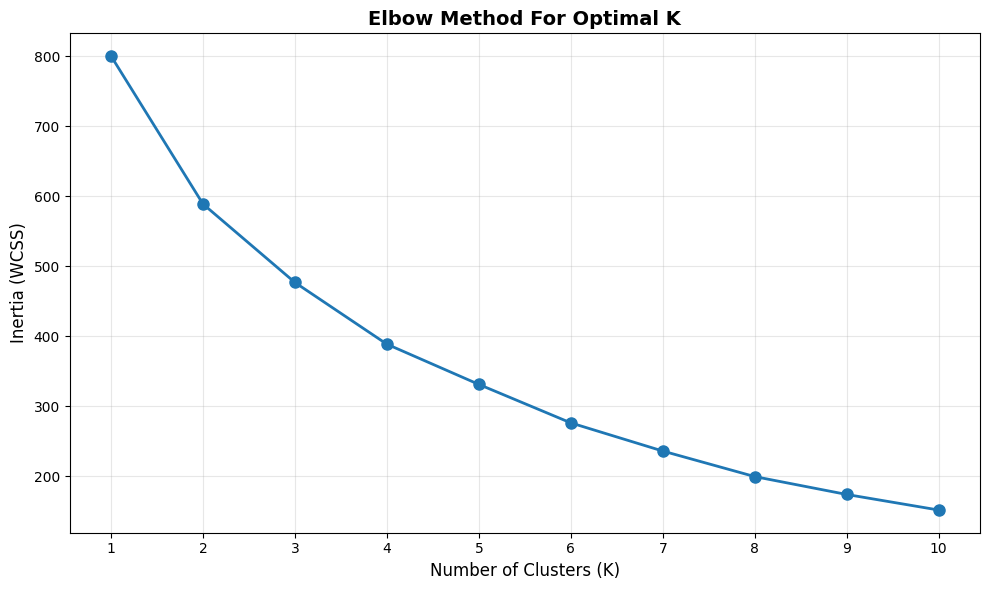

Inertia values for each K:
K=1: 800.00
K=2: 588.80
K=3: 476.79
K=4: 388.72
K=5: 331.31
K=6: 276.41
K=7: 236.20
K=8: 199.75
K=9: 174.24
K=10: 152.03


In [8]:
# Calculate inertia (WCSS) for different values of k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method For Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

print("Inertia values for each K:")
for k, inertia in zip(K_range, inertias):
    print(f"K={k}: {inertia:.2f}")


In [9]:
k = 5  
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = labels
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,4
4,5,0,31,17,40,4


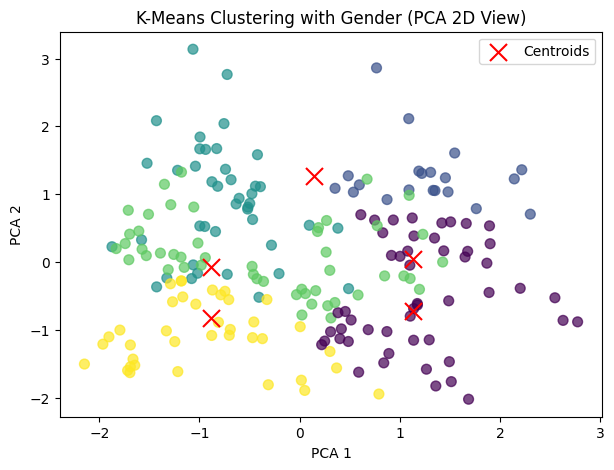

In [10]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=150, label='Centroids')
plt.title("K-Means Clustering with Gender (PCA 2D View)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()


For K=2, Silhouette Score: 0.2518
For K=3, Silhouette Score: 0.2595
For K=4, Silhouette Score: 0.2984
For K=5, Silhouette Score: 0.3041
For K=6, Silhouette Score: 0.3311
For K=7, Silhouette Score: 0.3574
For K=8, Silhouette Score: 0.3880
For K=9, Silhouette Score: 0.4031
For K=10, Silhouette Score: 0.4208


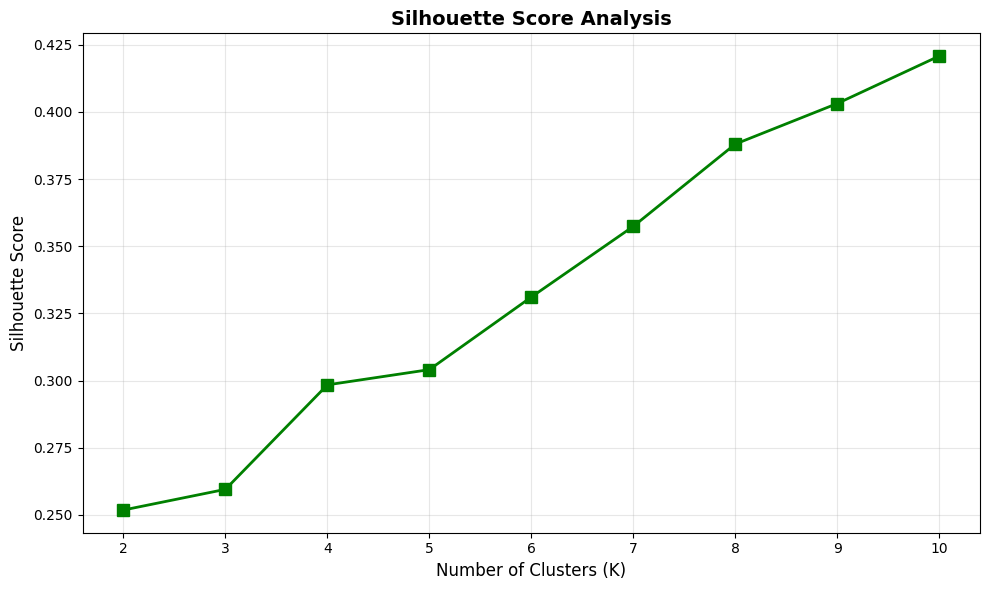


Optimal K based on Silhouette Score: 10


In [11]:
# Calculate silhouette scores for different values of k
silhouette_scores = []
K_range_silhouette = range(2, 11)

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For K={k}, Silhouette Score: {silhouette_avg:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K_range_silhouette, silhouette_scores, marker='s', linestyle='-', 
         linewidth=2, markersize=8, color='green')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score Analysis', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range_silhouette)
plt.tight_layout()
plt.show()

# Find optimal K based on silhouette score
optimal_k = K_range_silhouette[np.argmax(silhouette_scores)]
print(f"\nOptimal K based on Silhouette Score: {optimal_k}")


In [12]:
cluster_summary = df.groupby('Cluster')[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Summary:\n", cluster_summary)


Cluster Summary:
            Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.509804  56.470588           46.098039               39.313725
1        1.000000  39.500000           85.150000               14.050000
2        1.000000  28.690476           60.904762               70.238095
3        0.000000  37.897959           82.122449               54.448980
4        0.000000  27.315789           38.842105               56.210526
